In [263]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [264]:
solar_data = pd.read_csv("train.csv")

In [265]:
solar_data.head()

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
0,0,0,0,0,0,1.5,69.08,-12,0.0
1,0,0,30,0,0,1.5,69.06,-12,0.0
2,0,1,0,0,0,1.6,71.78,-12,0.0
3,0,1,30,0,0,1.6,71.75,-12,0.0
4,0,2,0,0,0,1.6,75.20,-12,0.0


In [364]:
#결측치 확인
solar_data.isnull().sum()

Day       0
Hour      0
Minute    0
DHI       0
DNI       0
WS        0
RH        0
T         0
TARGET    0
dtype: int64

In [366]:
solar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52560 entries, 0 to 52559
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     52560 non-null  int64  
 1   Hour    52560 non-null  int64  
 2   Minute  52560 non-null  int64  
 3   DHI     52560 non-null  int64  
 4   DNI     52560 non-null  int64  
 5   WS      52560 non-null  float64
 6   RH      52560 non-null  float64
 7   T       52560 non-null  int64  
 8   TARGET  52560 non-null  float64
dtypes: float64(3), int64(6)
memory usage: 3.6 MB


In [365]:
solar_data.describe()

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
count,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000
mean,547.000000,11.500000,15.000000,64.344121,234.792371,2.456033,56.793102,9.279928,17.790630
std,316.102148,6.922252,15.000143,103.897125,349.684583,1.426874,22.052875,10.179741,25.759955
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.590000,-19.000000,0.000000
25%,273.000000,5.750000,0.000000,0.000000,0.000000,1.400000,39.697500,1.000000,0.000000
50%,547.000000,11.500000,15.000000,0.000000,0.000000,2.200000,57.600000,9.000000,0.000000
75%,821.000000,17.250000,30.000000,87.000000,469.000000,3.200000,72.770000,17.000000,32.089890
max,1094.000000,23.000000,30.000000,528.000000,1059.000000,12.000000,100.000000,35.000000,99.913939


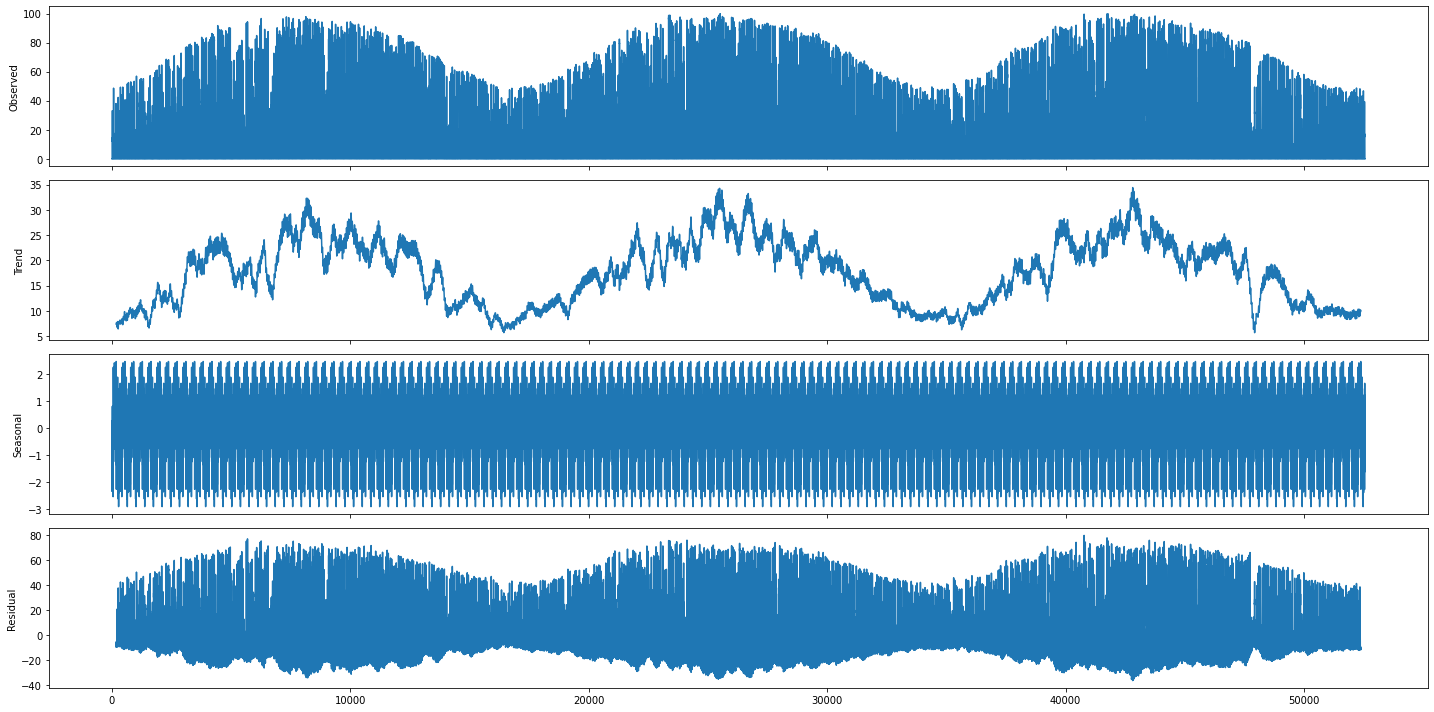

In [370]:
series = pd.Series(solar_data['TARGET'])
results = seasonal_decompose(series, model='additive',freq = 365)
plt.rcParams['figure.figsize'] = (20.0, 10.0)
results.plot()
plt.show()

In [69]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value'):
    plt.figure(figsize=(16,5))
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

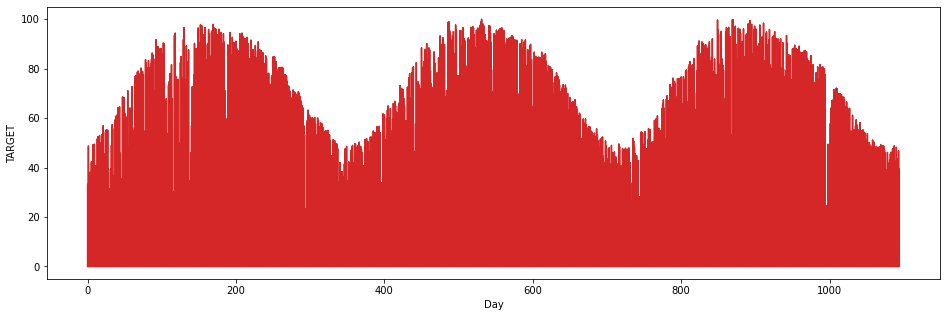

In [70]:
plot_df(solar_data, solar_data.index, solar_data.TARGET, title ="", xlabel= "Day", ylabel = "TARGET")

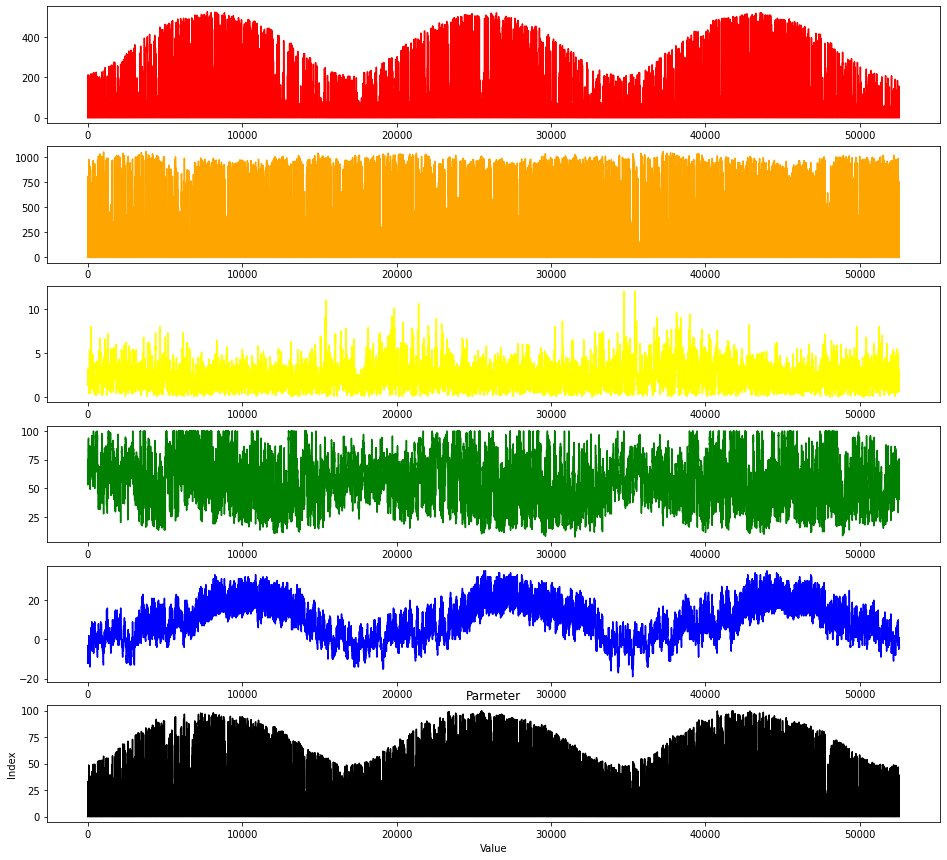

In [321]:
parameter_list = ["DHI", "DNI", "WS", "RH", "T", "TARGET"]
color_list = ["red", "orange", "yellow", "green", "blue", "black"]

plt.figure(figsize=(16,15))
for i in range(6):
    plt.subplot(6, 1, i+1)
    plt.plot(solar_data.index, solar_data[parameter_list[i]], color=color_list[i])

plt.gca().set(title="Parmeter", xlabel="Value", ylabel="Index")
plt.show()

In [332]:
summer_day = (solar_data.Day % 365 >= 180) & (solar_data.Day % 365 < 240)
winter_day = ((solar_data.Day % 365 >= 0) & (solar_data.Day % 365 < 60)) | ((solar_data.Day % 365 >= 335) & (solar_data.Day % 365 < 365))
summer_day_value = solar_data.loc[summer_day,:]
winter_day_value = solar_data.loc[winter_day,:]
summer_day_value, winter_day_value

(       Day  Hour  Minute  DHI  DNI   WS     RH   T  TARGET
 8640   180     0       0    0    0  1.4  81.69  15     0.0
 8641   180     0      30    0    0  1.5  87.15  15     0.0
 8642   180     1       0    0    0  1.7  86.73  15     0.0
 8643   180     1      30    0    0  1.7  86.72  15     0.0
 8644   180     2       0    0    0  1.8  86.82  15     0.0
 ...    ...   ...     ...  ...  ...  ...    ...  ..     ...
 46555  969    21      30    0    0  3.0  69.00  16     0.0
 46556  969    22       0    0    0  3.1  69.64  16     0.0
 46557  969    22      30    0    0  3.0  69.64  16     0.0
 46558  969    23       0    0    0  3.0  69.94  16     0.0
 46559  969    23      30    0    0  2.8  74.62  15     0.0
 
 [8640 rows x 9 columns],
         Day  Hour  Minute  DHI  DNI   WS     RH   T  TARGET
 0         0     0       0    0    0  1.5  69.08 -12     0.0
 1         0     0      30    0    0  1.5  69.06 -12     0.0
 2         0     1       0    0    0  1.6  71.78 -12     0.0
 3      

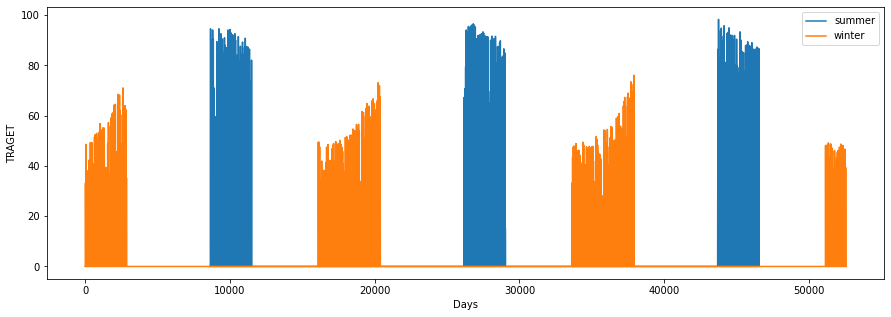

In [333]:
plt.figure(figsize=(15,5))
plt.plot(summer_day_value.TARGET, label="summer")
plt.plot(winter_day_value.TARGET, label="winter")
plt.xlabel('Days')
plt.ylabel('TRAGET')
plt.legend()

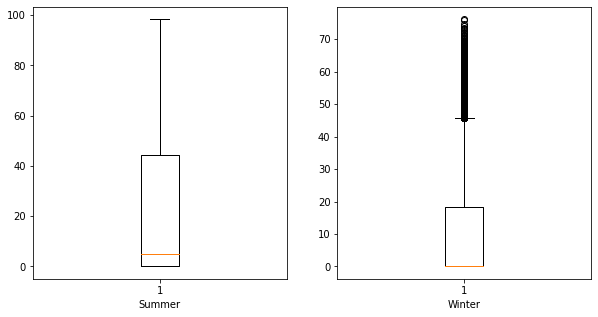

In [334]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.boxplot(summer_day_value.TARGET)
plt.xlabel("Summer")

plt.subplot(122)
plt.boxplot(winter_day_value.TARGET)
plt.xlabel("Winter")

plt.show()

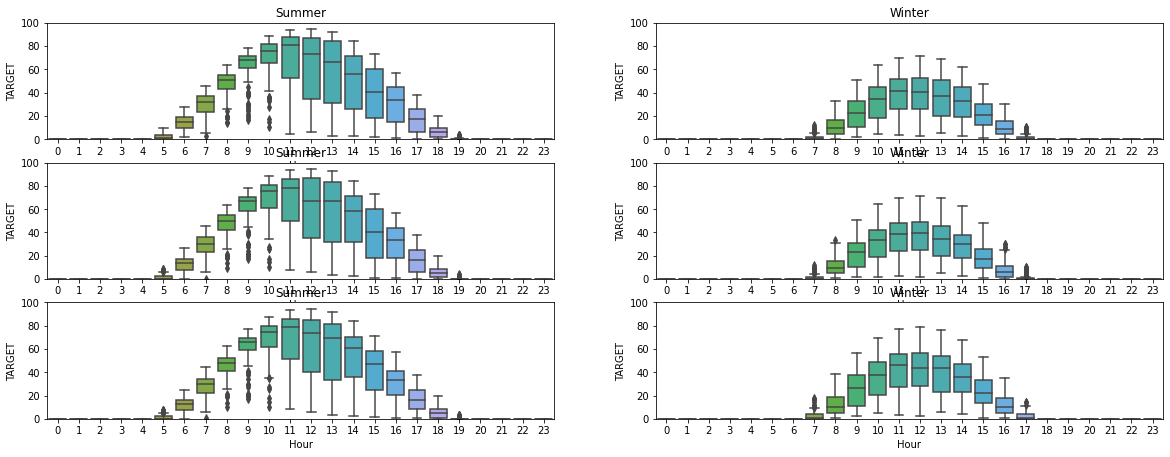

In [363]:
# 여름(6, 7, 8월) / 겨울(1, 2, 12월)
winter_month = []
summer_month = []
for i in range(3):
    summer_month.append(solar_data.iloc[i*365 + 180*48 : i*365 + 240*48 ])
    winter_df_1 = solar_data.iloc[i*365 : i*365 + 60 * 48]
    winter_df_2 = solar_data.iloc[i*365 + 335*48 : i*365 + 365*48 ]
    winter_df = pd.concat([winter_df_1, winter_df_2])
    winter_month.append(solar_data.iloc[i*365 : i*365 + 60 * 48])
    winter_month.append(winter_df)

# 시각화 코드
plt.figure(figsize=(20,15))
subplot_index = 0
for i in range(1, 4):
    plt.subplot(6,2, i*2-1)
    sns.boxplot(x="Hour", y="TARGET", data=summer_month[i-1])
    plt.title("Summer")
    plt.ylim(0, 100)
    plt.subplot(6, 2, i*2)
    sns.boxplot(x="Hour", y="TARGET", data=winter_month[i-1])
    plt.title("Winter")
    plt.ylim(0, 100)
plt.show()